In [1]:
pip install librosa


Note: you may need to restart the kernel to use updated packages.


In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import sys
import os
import pickle
import librosa
import librosa.display
from IPython.display import Audio
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras as k


*Reading the CSV file*


In [2]:
df = pd.read_csv('C:/Users/srini/MLProjects/features_3_sec.csv')
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [3]:
df.shape

(9990, 60)

In [4]:
"""Returns the data types in the Dataframe"""
df.dtypes

filename                    object
length                       int64
chroma_stft_mean           float64
chroma_stft_var            float64
rms_mean                   float64
rms_var                    float64
spectral_centroid_mean     float64
spectral_centroid_var      float64
spectral_bandwidth_mean    float64
spectral_bandwidth_var     float64
rolloff_mean               float64
rolloff_var                float64
zero_crossing_rate_mean    float64
zero_crossing_rate_var     float64
harmony_mean               float64
harmony_var                float64
perceptr_mean              float64
perceptr_var               float64
tempo                      float64
mfcc1_mean                 float64
mfcc1_var                  float64
mfcc2_mean                 float64
mfcc2_var                  float64
mfcc3_mean                 float64
mfcc3_var                  float64
mfcc4_mean                 float64
mfcc4_var                  float64
mfcc5_mean                 float64
mfcc5_var           

In [5]:
df = df.drop(labels='filename', axis=1)

*Understanding the audio files*

The data, sr = librosa.load(audio_recording) line lets you load and decode the audio as a time series.

sr = sampling rate of y. It is the number of samples per second. 20 kHz is the audible range for human beings. So it is used as the default value for sr. In this code we are using sr as 45600Hz.

Data essentially contains the audio waveform in the form of a time series.


In [6]:
audio_recording = "C:/Users/srini/Downloads/Data/genres_original/classical/classical.00099.wav"
data, sr = librosa.load(audio_recording)
print(type(data), type(sr))

<class 'numpy.ndarray'> <class 'int'>


The librosa.load returns the audio data as a 1D Numpy array. Each element in this array represents the amplitude 
of the audio signal at a specific point in time.

In [7]:
librosa.load(audio_recording, sr=45600)

(array([ 0.00476825,  0.00619493,  0.00500455, ..., -0.00473495,
        -0.00362532, -0.00162683], dtype=float32),
 45600)

<h4>Time Series:</h4>
A time series is a sequence of data points collected or recorded at successive time intervals. In other words, it's a series of observations ordered chronologically over time. Each data point in a time series corresponds to a specific time or time period.

Time series analysis involves studying the patterns, trends, and behaviors present in the data over time. This analysis can include techniques for visualization, forecasting, modeling, anomaly detection, and more. Time series data is commonly analyzed in fields such as finance, economics, engineering, environmental science, and healthcare, among others.

<h5>Decoding the Audio</h5>The audio file may be encoded using different codecs. Librosa decodes the audio file to extract the raw audio waveform.



<h5>Amplitude</h5> Represents the magnitude of the sound wave at a specific point in time. 
It corresponds to the loudness or intensity of the sound. 
Each sample represents the amplitude of the audio signal at a specific moment in time. By collecting these samples at regular intervals, we can reconstruct the audio waveform digitally.

<h2>Playing the audio file in python</h2>
<h4> We can use the IPython.display.Audio library to play music in the notebook</h4>

In [8]:
import IPython
IPython.display.Audio(data, rate=sr)

<h2> Visualizing audio files </h2>


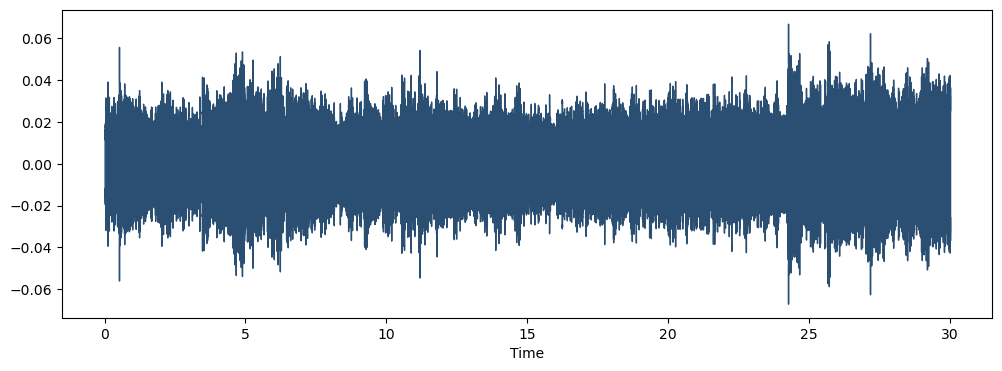

In [9]:
plt.figure(figsize=(12,4))
librosa.display.waveshow(data, color="#2B4F72")
plt.show()

<h2>Spectograms</h2>
A spectrogram is a visual way of representing the signal loudness of a signal over time at various frequencies present in a particular waveform. We can see the energy variations vary over time using spectograms

In 2-dimensional arrays, the y axis is frequency while the x axis is time.

<h4>When we convert the STFT coefficients to decibels (dB) scale using librosa.amplitude_to_db, we are essentially transforming the amplitude values from a linear scale to a logarithmic scale. </h4>

C:\Users\srini\AppData\Local\Temp\ipykernel_13624\3783417044.py:4: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  librosa.display.specshow(stft, sr = sr, x_axis='time', y_axis='hz')


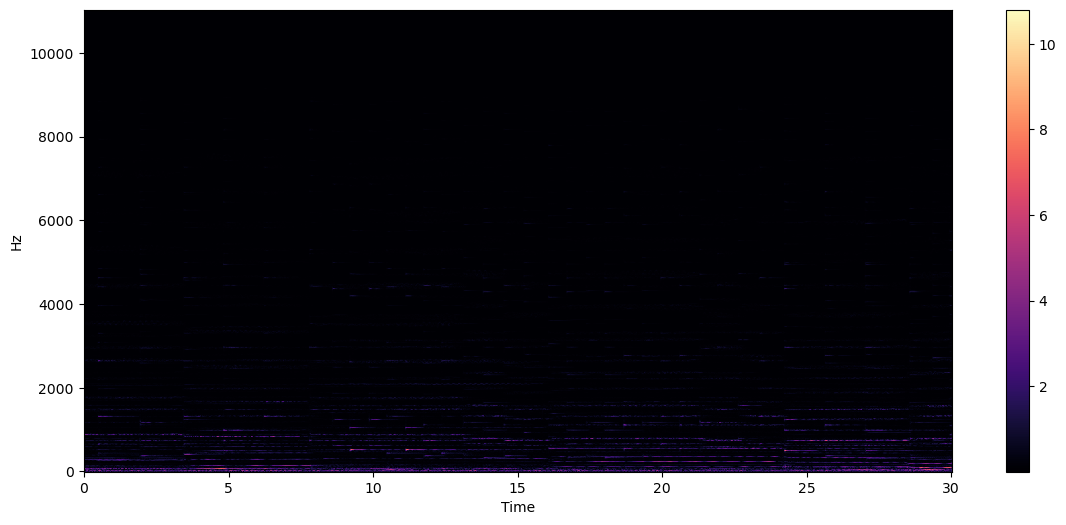

In [10]:
stft = librosa.stft(data)
stft_db = librosa.amplitude_to_db(abs(stft))
plt.figure(figsize=(14,6))
librosa.display.specshow(stft, sr = sr, x_axis='time', y_axis='hz')
plt.colorbar()

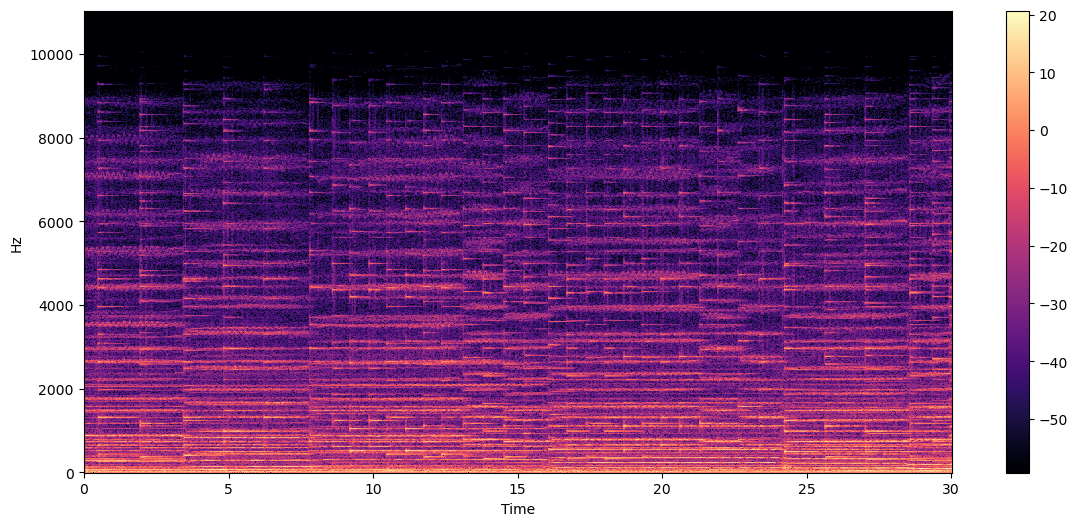

In [11]:
stft = librosa.stft(data)
stft_db = librosa.amplitude_to_db(abs(stft))
plt.figure(figsize=(14,6))
librosa.display.specshow(stft_db, sr = sr, x_axis='time', y_axis='hz')
plt.colorbar()

<h4>Spectral Rolloff</h4>

librosa.feature.spectral_rolloff computes the rolloff frequency for each frame in a signal.

tip : librosa.display has no waveplot() but has waveshow()

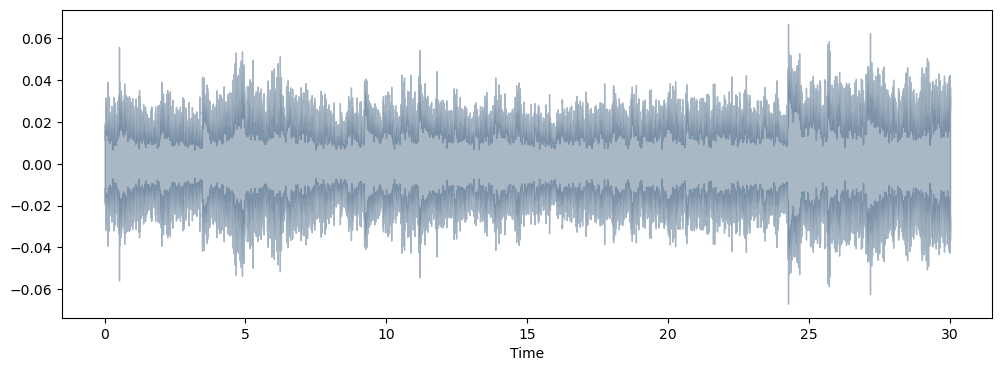

In [12]:
from sklearn.preprocessing import normalize
spectral_rolloff = librosa.feature.spectral_rolloff(y = data+0.01, sr=sr)[0]
plt.figure(figsize=(12,4))
librosa.display.waveshow(data, sr=sr, alpha=0.4, color="#2B4F72")

<h1>Chroma feature</h1>

C:\Users\srini\AppData\Local\Temp\ipykernel_13624\4010261548.py:4: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  lplt.specshow(chroma, sr=sr, x_axis='time', y_axis='chroma', cmap='coolwarm')


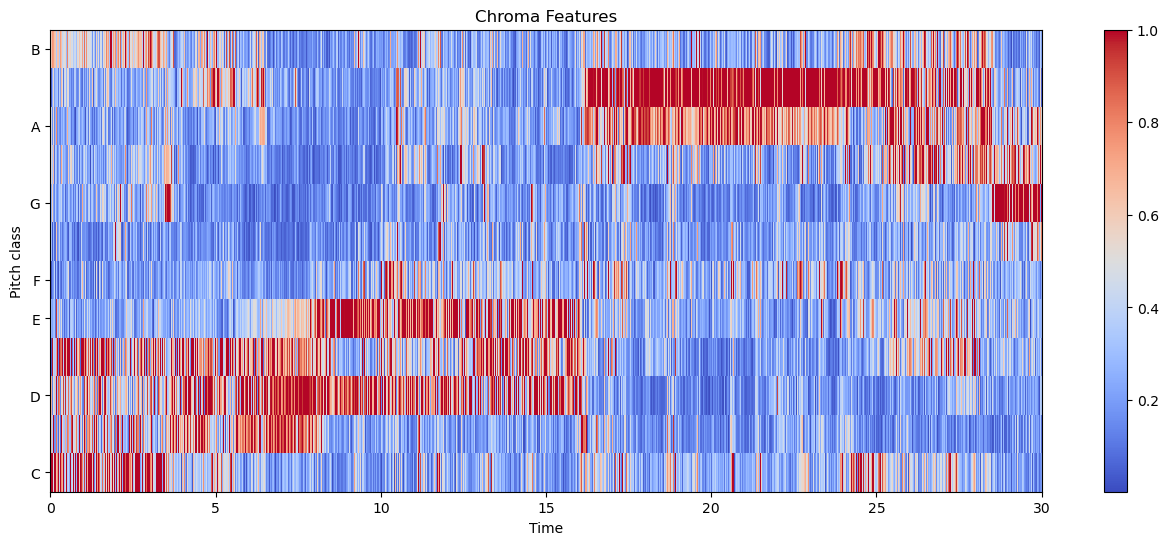

In [14]:
import librosa.display as lplt
chroma = librosa.feature.chroma_stft(S=stft, sr=sr)
plt.figure(figsize=(16,6))
lplt.specshow(chroma, sr=sr, x_axis='time', y_axis='chroma', cmap='coolwarm')
plt.colorbar()
plt.title("Chroma Features")
plt.show()

<h1>Zero Crossing Rate</h1>

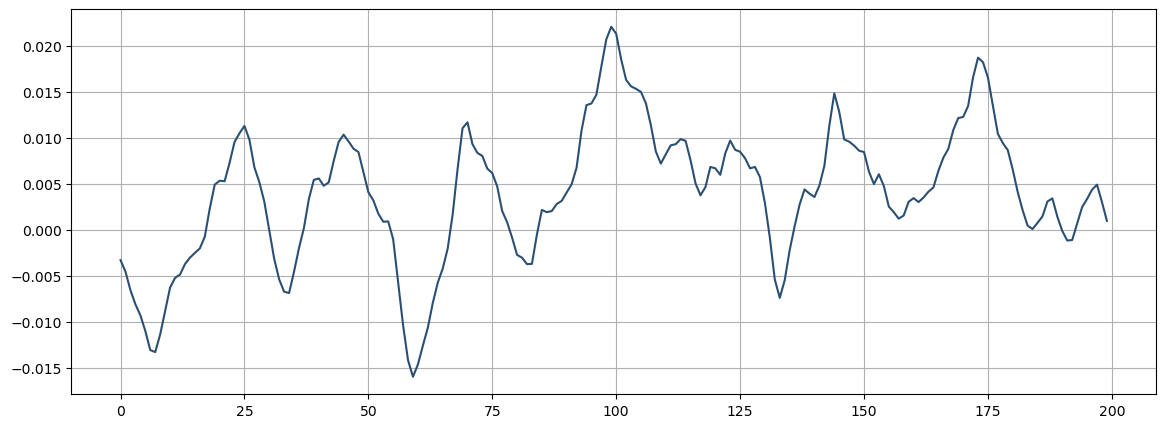

In [15]:
start = 1000
end = 1200
plt.figure(figsize=(14,5))
plt.plot(data[start:end], color="#2B4F72")
plt.grid()

In [16]:
zero_cross_rate = librosa.zero_crossings(data[start:end], pad = False)
print("the number of zero crossings:", sum(zero_cross_rate))

the number of zero crossings: 11


<h1> Feature Extraction </h1>



In [19]:
class_list = df.iloc[:, -1]
converter = LabelEncoder()

In [20]:
y = converter.fit_transform(class_list)
y

array([0, 0, 0, ..., 9, 9, 9])

In [21]:
print(df.iloc[:, :-1])

      length  chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0      66149          0.335406         0.091048  0.130405  0.003521   
1      66149          0.343065         0.086147  0.112699  0.001450   
2      66149          0.346815         0.092243  0.132003  0.004620   
3      66149          0.363639         0.086856  0.132565  0.002448   
4      66149          0.335579         0.088129  0.143289  0.001701   
...      ...               ...              ...       ...       ...   
9985   66149          0.349126         0.080515  0.050019  0.000097   
9986   66149          0.372564         0.082626  0.057897  0.000088   
9987   66149          0.347481         0.089019  0.052403  0.000701   
9988   66149          0.387527         0.084815  0.066430  0.000320   
9989   66149          0.369293         0.086759  0.050524  0.000067   

      spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0                1773.065032          167541.630869              19

<h1> Standardization of features </h1>

In [23]:
from sklearn.preprocessing import StandardScaler
fit = StandardScaler()
X = fit.fit_transform(np.array(df.iloc[:, :-1], dtype=float))

<h1> Splitting into test and training data </h1>

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [31]:
len(y_train)

6693

In [32]:
len(y_test)

3297

<h1> Model Building </h1>

In [34]:
from keras.models import Sequential

In [41]:
def trainModel(model, epochs , optimizer):
    batch_size = 128
    model.compile(optimizer = optimizer, 
                 loss = 'sparse_categorical_crossentropy',
                 metrics = 'accuracy')
    return model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = epochs, 
                    batch_size = batch_size)

In [42]:
def plotValidation(history):
    print("Validation Accuracy", max(history.history["val_accuracy"]))
    pd.DataFrame(history.history).plot(figsize=(12,6))
    plt.show()

In [43]:
model = k.models.Sequential([
    k.layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    k.layers.Dropout(0.2),
    
    k.layers.Dense(256, activation='relu'),
    k.layers.Dropout(0.2),
    
    k.layers.Dense(128, activation='relu'),
    k.layers.Dropout(0.2),
    
    k.layers.Dense(64, activation='relu'),
    k.layers.Dropout(0.2),
    
    k.layers.Dense(10, activation='softmax'),
])

print(model.summary())
model_history = trainModel(model = model, epochs= 600, optimizer='adam')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 512)               30208     
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 256)               131328    
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 64)               

<h1> Model Evaluation </h1>

In [46]:
test_loss, test_acc = model.evaluate(X_test, y_test, batch_size=128)
print("The test loss is:", test_loss)
print("\nThe best test Accuarcay:",test_acc*100)

26/26 [==============================] - 0s 3ms/step - loss: 0.5904 - accuracy: 0.9272
The test loss is: 0.5903893113136292

The best test Accuarcay: 92.72065758705139


<h3>we achieved an Accuracy of 92% after we run the training data for 600 epochs. We may tune it out to a fewer epochs and also 
used drouput layers ofr pverfittign of the data. </h3>